# **K_Means Clustering**

> ### Mitul Agrawal

Drive Link : [PRML Lab 9 Drive](https://drive.google.com/drive/folders/1vkYarEi9wwzYPbZJ7dC6kPIperPopT1O?usp=sharing)

In [ ]:
path = '/content/drive/My Drive/PRML/Lab 9/'

##K-Means Clustering

####Preprocessing

In [ ]:
import pandas as pd
import random
pd.options.mode.chained_assignment = None

df = pd.read_csv(path+'fashion-mnist_train.csv')

df.head(4)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0


In [ ]:
def str_to_num(df) : 
  for col in df : 
    try : df[col] = pd.to_numeric(df[col])
    except : pass

def normalize_dbc(df,c=1,cols=None,exceptions=None,round=None) : 
  if cols is None : 
    cols = df.columns
    if exceptions is not None : cols = [c for c in cols if c not in exceptions]
  if(type(cols)!=list) : cols = [cols]
  for col in cols : 
    df[col] = df[col].div(c)
    if round is not None : df[col] = df[col].round(round)

str_to_num(df)

normalize_dbc(df,exceptions=["label"],c=255)

df.head(4)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,9,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,6,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,...,0.000000,0.0,0.0,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,...,0.011765,0.0,0.0,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0


In [ ]:
x = df.iloc[:,1:].copy()
y = df.iloc[:,0].copy()

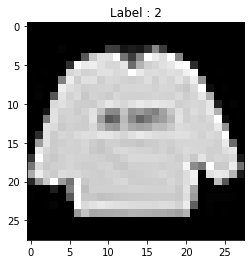

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

def plot_784(pix,label=None) : 
    if label is not None : plt.title(f'Label : {label}')
    plt.imshow(np.array(pix).reshape((28,28)),cmap='gray')
    plt.show()

plot_784(x.iloc[0],y.iloc[0])

####a-b) K-Means from Scratch

In [ ]:
class KMeans : 

  def __init__(self,k,initial_centers=None,max_iter=100) : 
    self.k = k
    self.cluster_centers = [None]*k
    if(initial_centers is not None) : self.cluster_centers = initial_centers
    self.max_iter = max_iter

  # def distance(self,l1,l2) : 
  #   s = sum([(l1[i]-l2[i])**2 for i in range(len(l1))]) 
  #   return np.sqrt(s)

  def train_step(self,x) : 
    n = x.shape[0]
    cluster = [0]*n
    d = np.zeros((self.k,n))
    for i in range(self.k) :
      #d = [self.distance(x.iloc[i],self.cluster_centers[j]) for j in range(k)]
      d[i] = np.sum(np.square(x-np.array(self.cluster_centers)[i]),axis=1)
      #cluster[i] = d.argmin()
    cluster = d.argmin(axis=0)
    for i in range(self.k) : 
      idx = [c for c,elem in enumerate(cluster) if elem==i]
      self.cluster_centers[i] = (x[idx]).mean(axis=0)
    
  def train(self,x) : 
    if(self.cluster_centers[0] is None) :  
      idx = random.sample(range(x.shape[0]),self.k)
      self.cluster_centers = [x.iloc[idx[i]] for i in range(self.k)]
    xt = np.array(x)
    while(self.max_iter>0) : 
      old_centers = self.cluster_centers.copy()
      self.train_step(xt)
      brk = True
      for i in range(self.k) : 
        if np.any(old_centers[i]==self.cluster_centers[i]) : brk = False
      if brk : break
      self.max_iter = self.max_iter-1

####c) Training Scratch K-Means Model

In [ ]:
k = 10

km = KMeans(k,max_iter=100)

km.train(x)

In [ ]:
n = x.shape[0]
cluster = [0]*n
d = np.zeros((k,n))
for i in range(k) :
  d[i] = np.sum(np.square(x-np.array(km.cluster_centers)[i]),axis=1)
cluster = d.argmin(axis=0)

for i in range(k) : 
  print(f"Cluster {i+1} :",np.count_nonzero(cluster==i))

Cluster 1 : 6522
Cluster 2 : 8917
Cluster 3 : 5833
Cluster 4 : 7391
Cluster 5 : 2568
Cluster 6 : 7832
Cluster 7 : 7433
Cluster 8 : 7253
Cluster 9 : 2279
Cluster 10 : 3972


####d) Visualizing Clusters

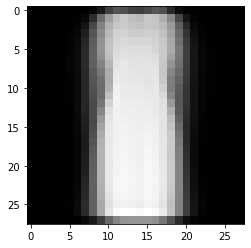

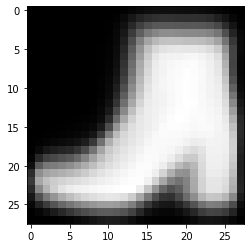

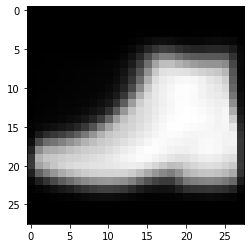

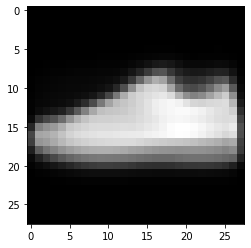

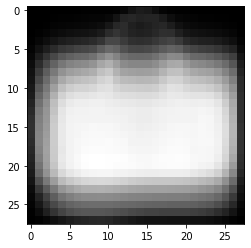

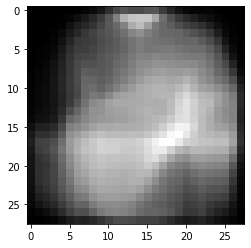

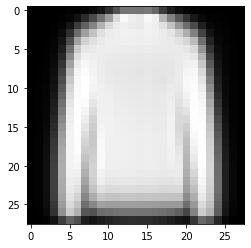

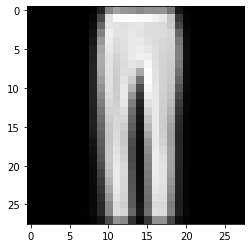

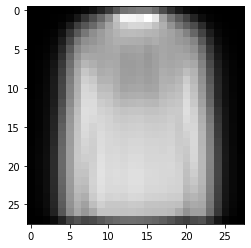

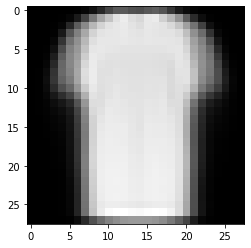

In [ ]:
for i in range(k) : 
  plot_784(km.cluster_centers[i])

####e) Visualizing 10 Images in each Cluster

Cluster 1 -


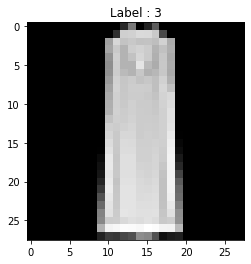

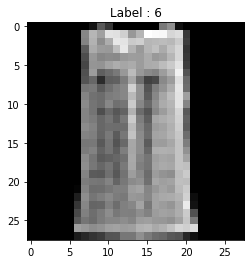

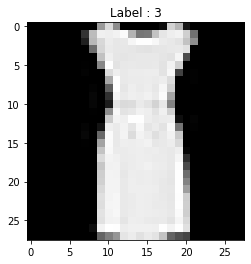

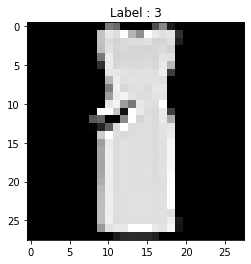

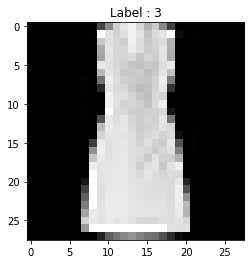

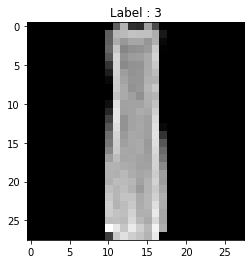

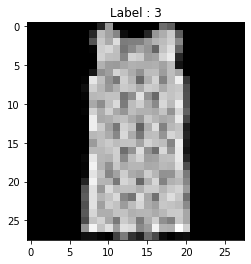

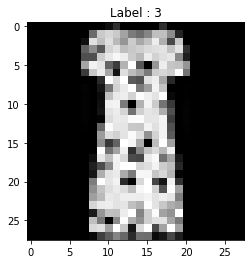

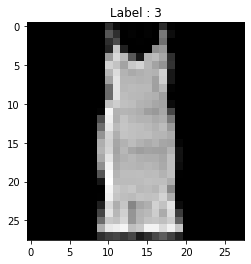

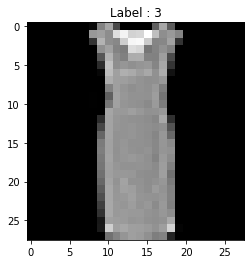



Cluster 2 -


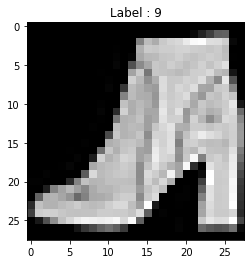

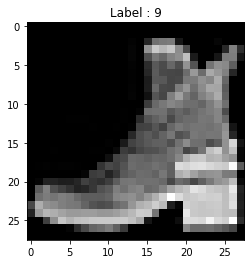

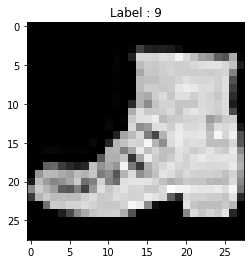

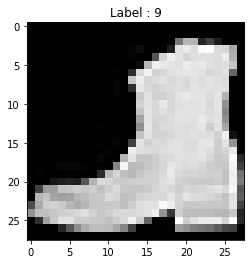

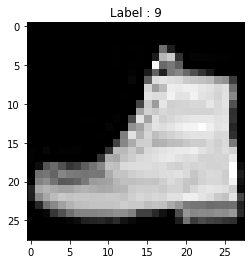

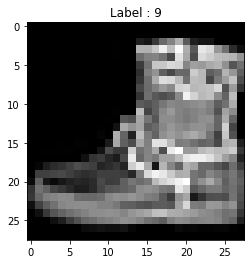

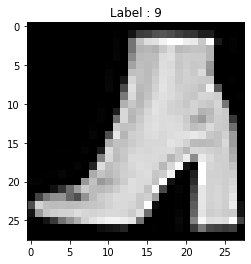

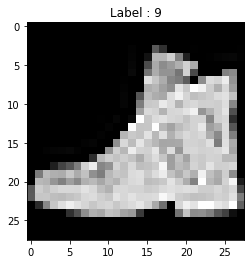

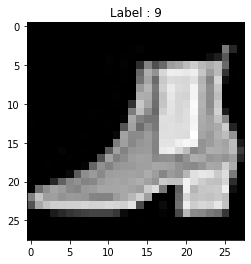

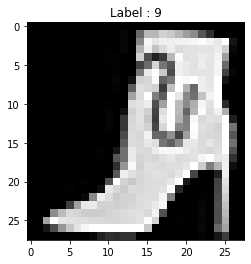



Cluster 3 -


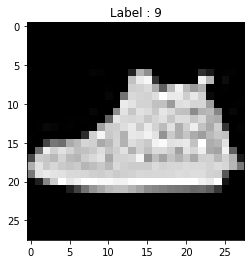

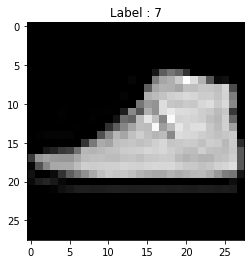

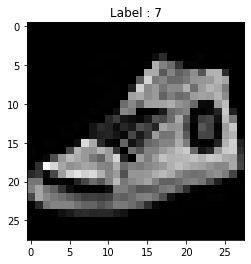

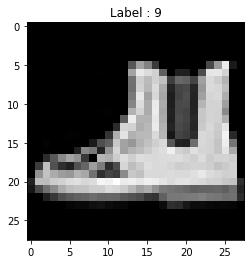

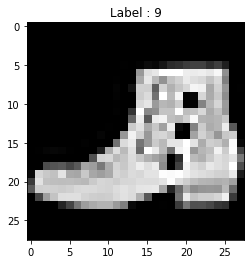

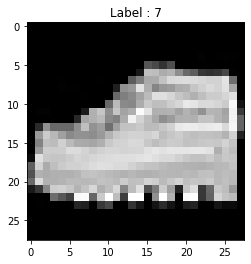

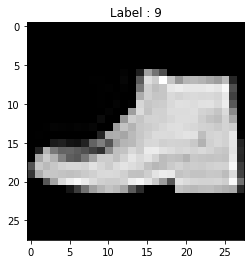

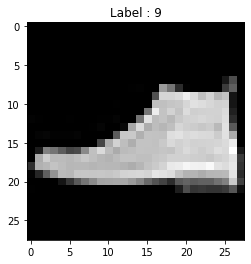

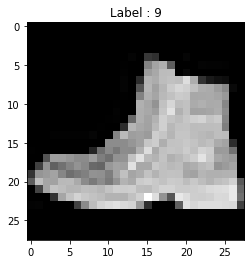

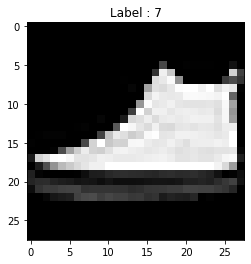



Cluster 4 -


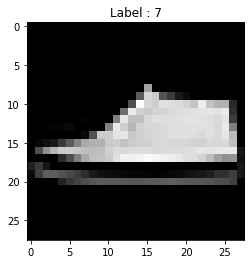

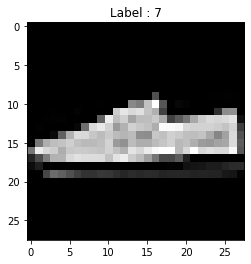

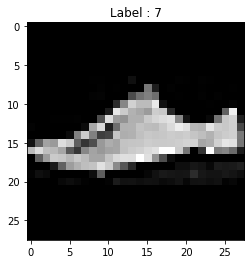

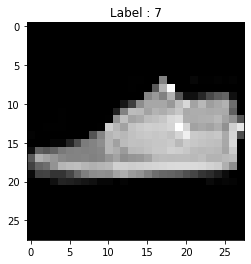

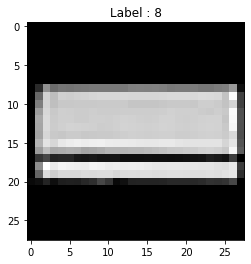

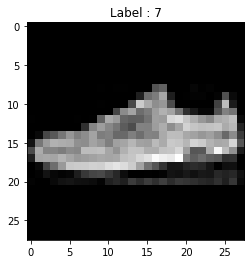

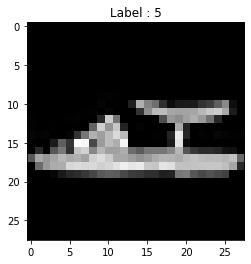

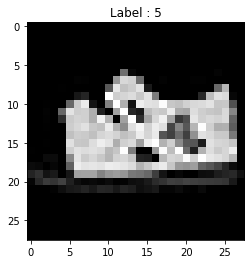

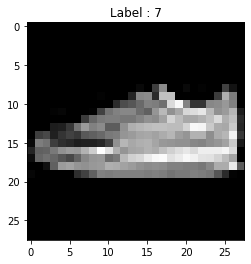

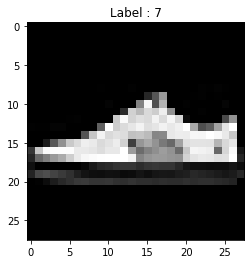



Cluster 5 -


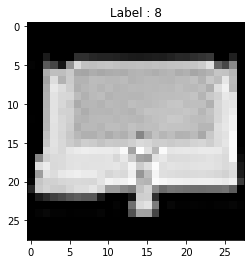

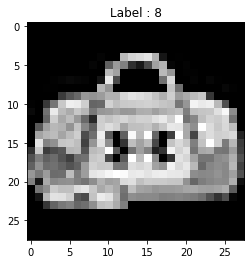

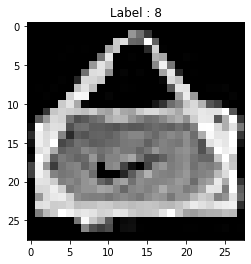

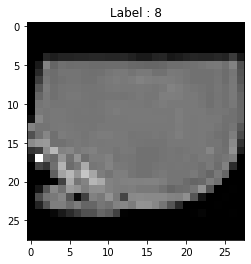

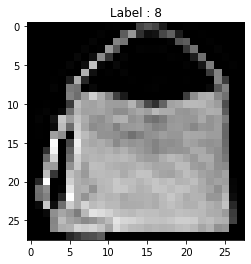

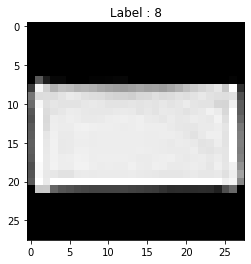

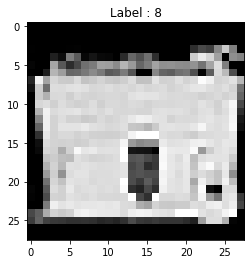

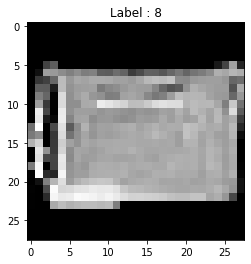

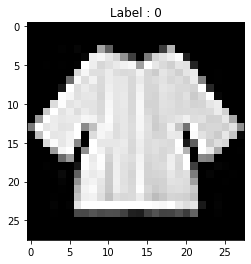

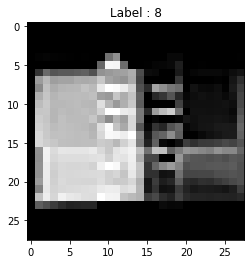



Cluster 6 -


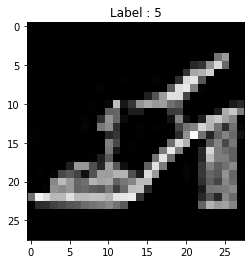

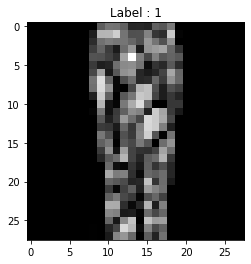

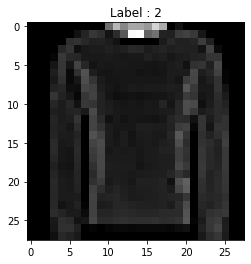

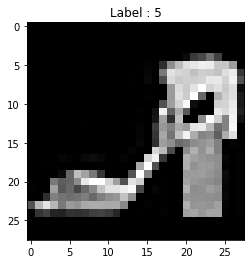

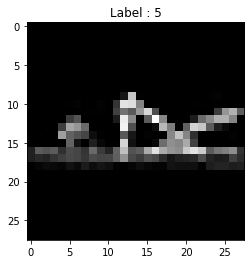

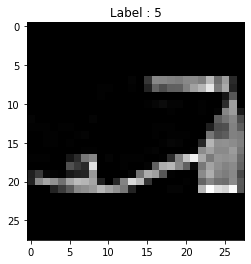

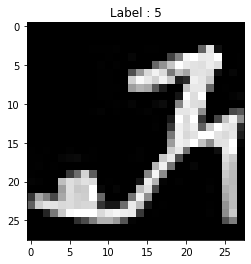

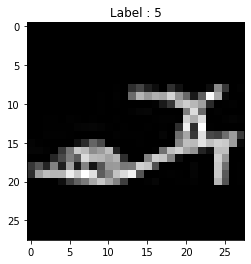

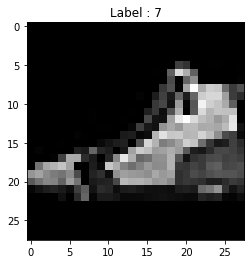

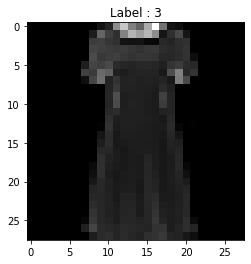



Cluster 7 -


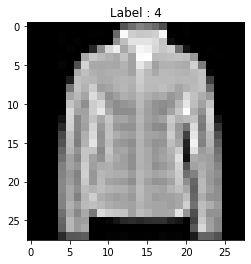

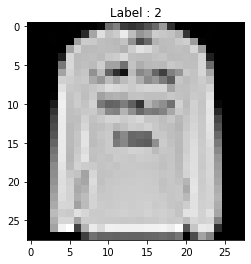

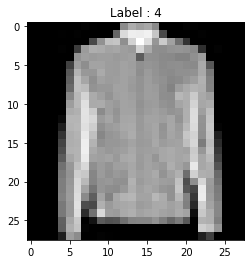

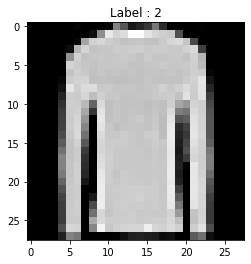

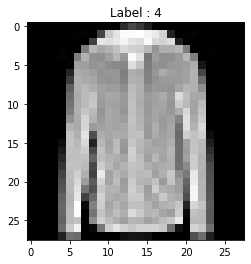

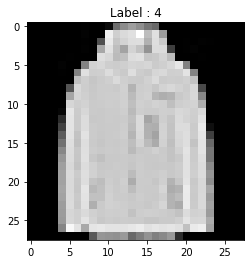

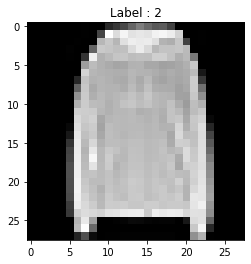

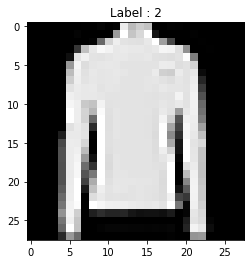

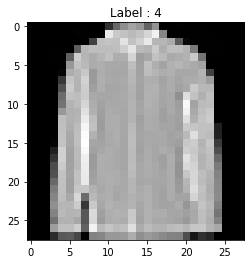

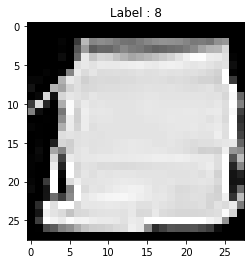



Cluster 8 -


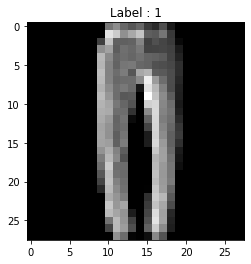

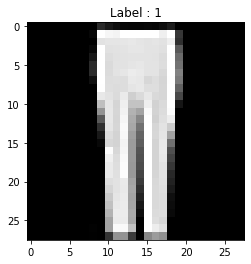

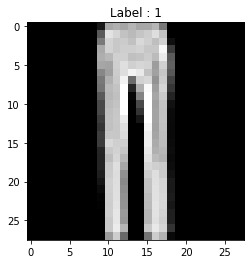

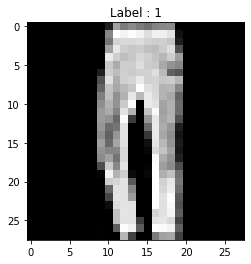

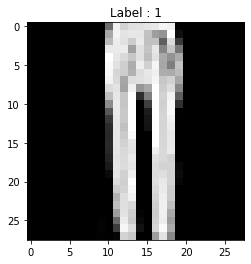

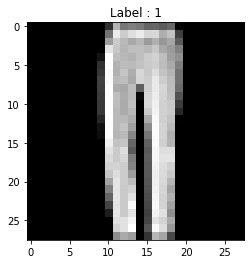

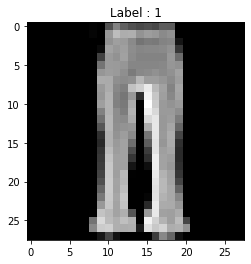

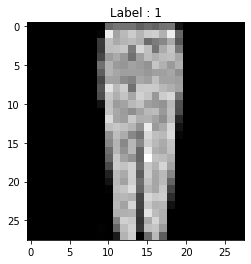

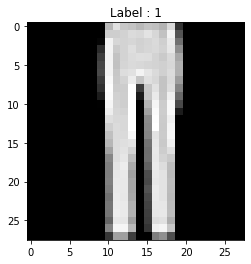

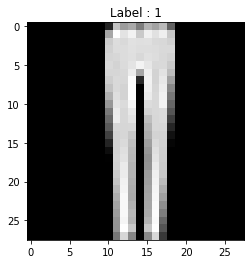



Cluster 9 -


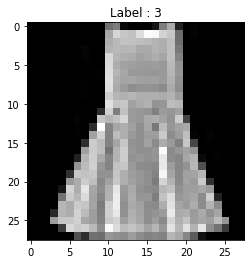

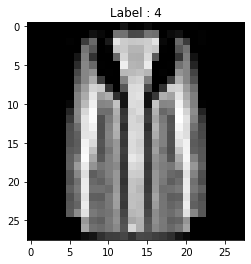

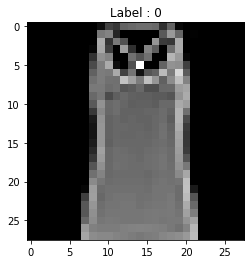

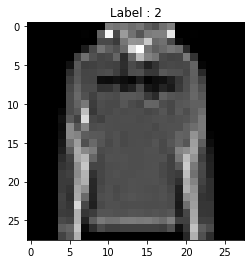

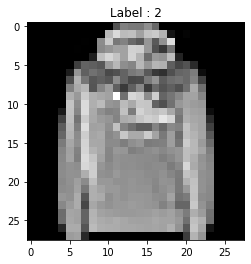

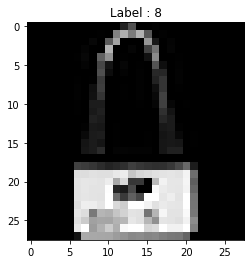

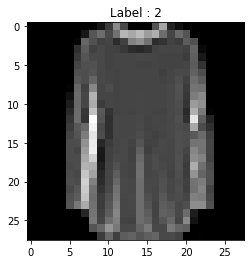

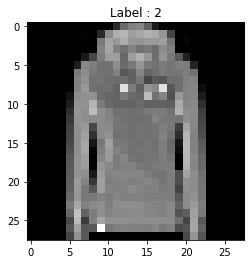

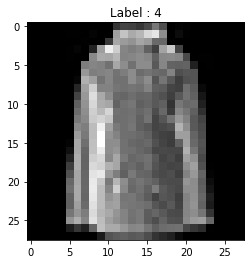

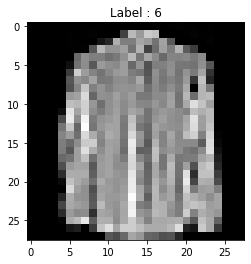



Cluster 10 -


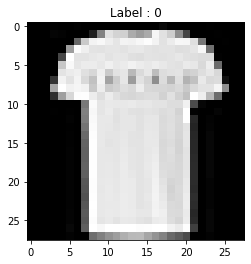

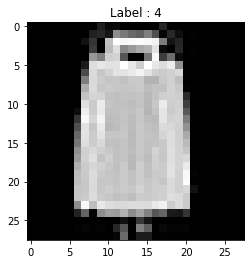

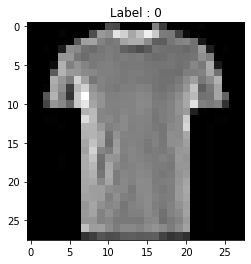

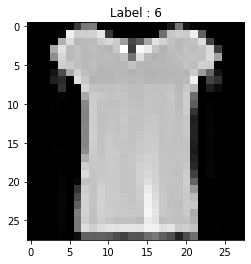

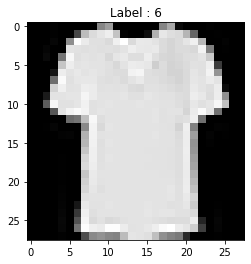

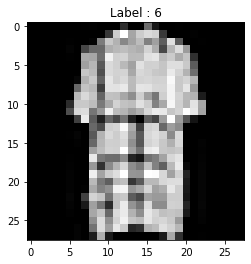

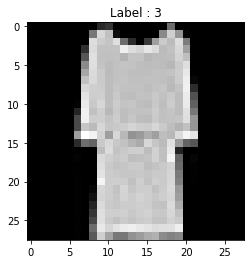

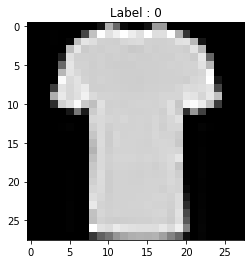

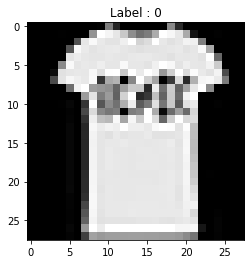

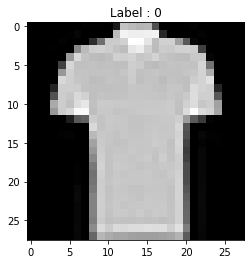

In [ ]:
n = x.shape[0]

cluster = [0]*n
d = np.zeros((k,n))

for i in range(k) :
  d[i] = np.sum(np.square(x-np.array(km.cluster_centers)[i]),axis=1)

cluster = d.argmin(axis=0)

for i in range(k) : 
  print("Cluster",i+1,"-")
  idx = random.sample([c for c,elem in enumerate(cluster) if elem==i], 10)
  for j in idx : 
    plot_784(x.iloc[j],y.iloc[j])
  print()
  print()

####f) Initializing each Label Separately 

In [ ]:
centers = [None]*10  

for i in range(10) : 
  idx = y[y==i].index[0]
  centers[i] = x.iloc[idx]

km2 = KMeans(k=10,initial_centers=centers,max_iter=25)

km2.train(x)

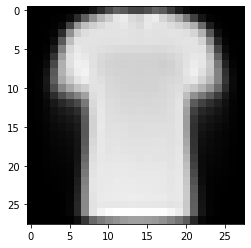

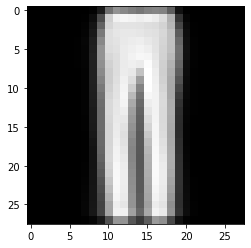

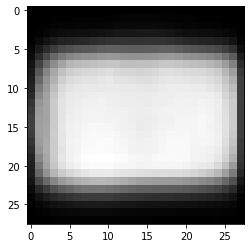

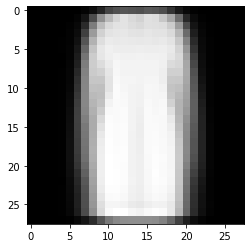

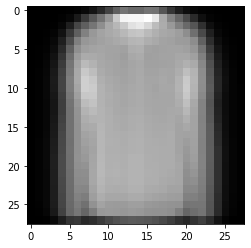

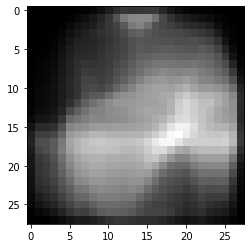

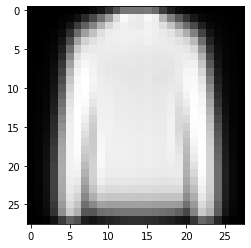

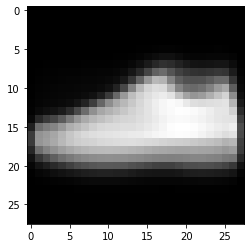

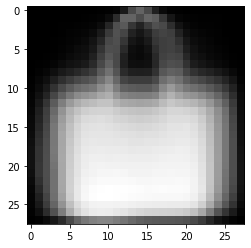

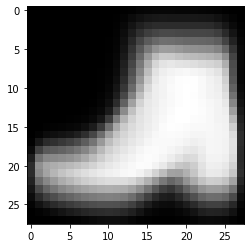

In [ ]:
for i in range(k) : 
  plot_784(km2.cluster_centers[i])

In [ ]:
k = 10

n = x.shape[0]
cluster = [0]*n
d = np.zeros((k,n))
for i in range(k) :
  d[i] = np.sum(np.square(x-np.array(km2.cluster_centers)[i]),axis=1)
cluster = d.argmin(axis=0)

for i in range(k) : 
  print(f"Cluster {i+1} :",np.count_nonzero(cluster==i))

Cluster 1 : 3786
Cluster 2 : 7791
Cluster 3 : 2355
Cluster 4 : 5175
Cluster 5 : 7542
Cluster 6 : 7720
Cluster 7 : 9666
Cluster 8 : 7550
Cluster 9 : 2575
Cluster 10 : 5840


####g) Visualizing 10 Images in each Cluster

Cluster 1 -


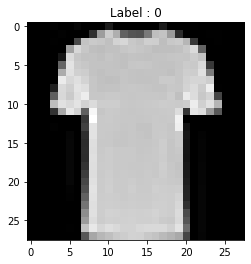

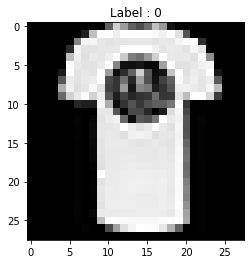

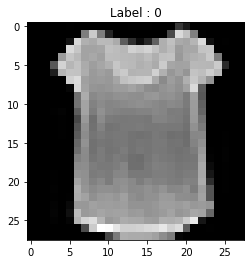

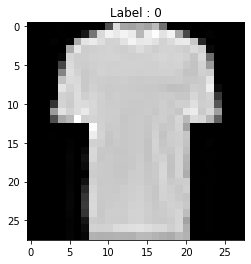

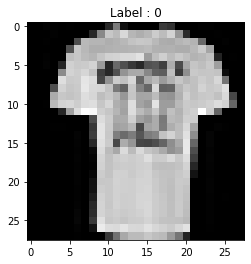

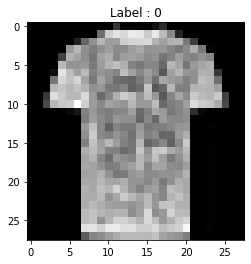

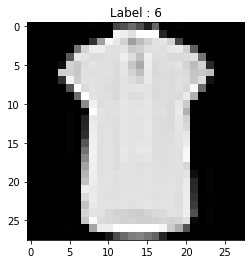

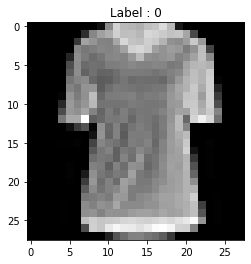

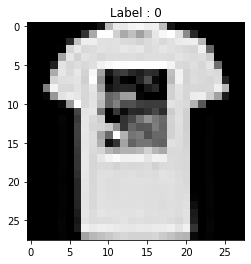

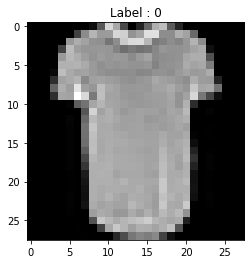



Cluster 2 -


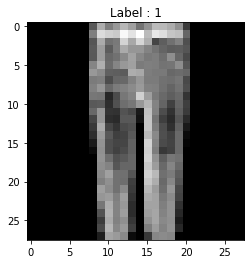

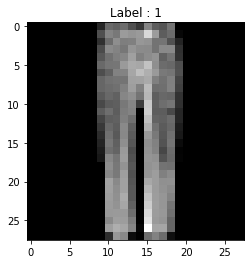

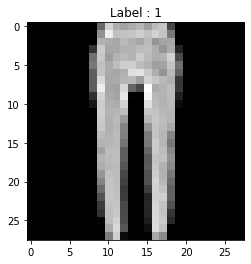

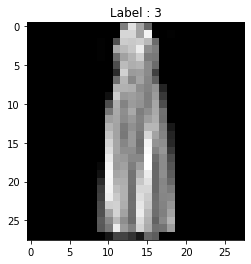

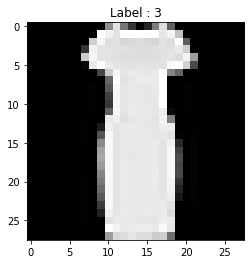

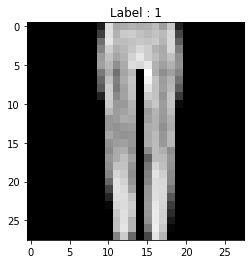

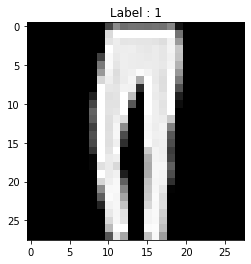

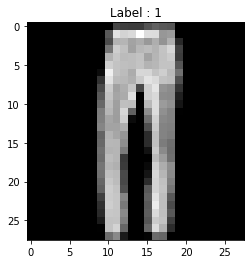

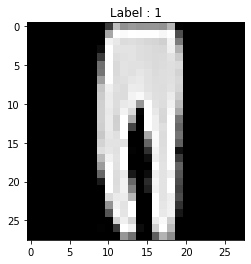

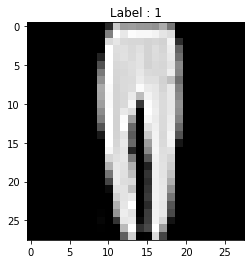



Cluster 3 -


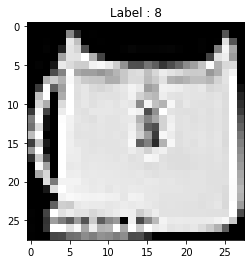

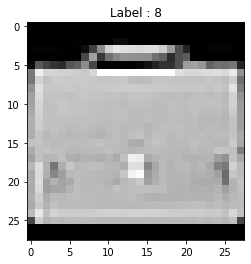

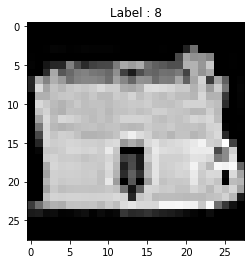

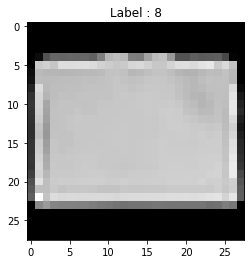

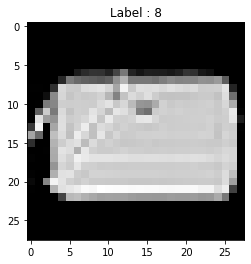

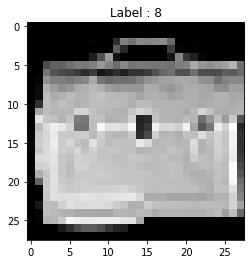

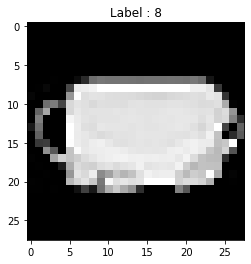

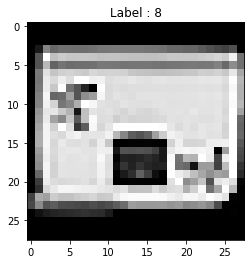

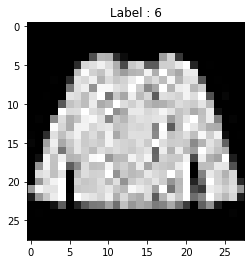

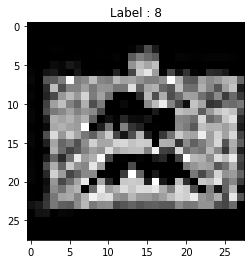



Cluster 4 -


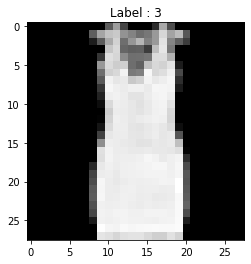

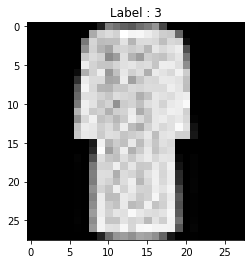

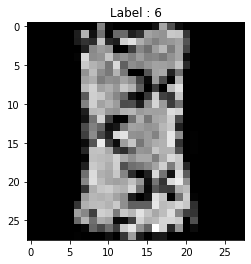

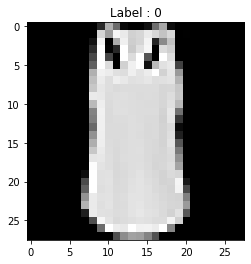

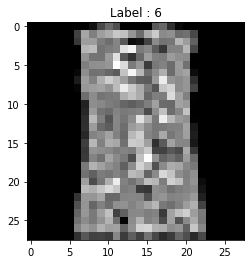

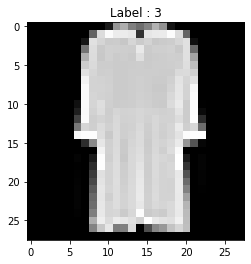

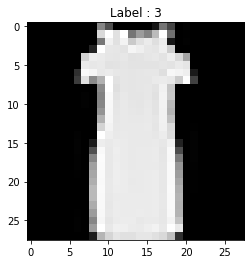

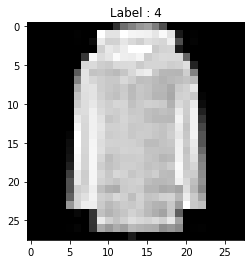

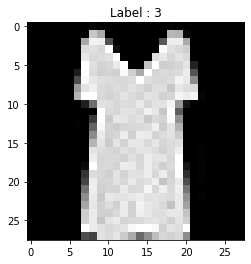

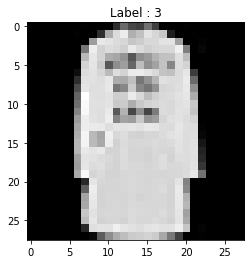



Cluster 5 -


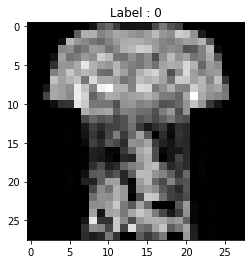

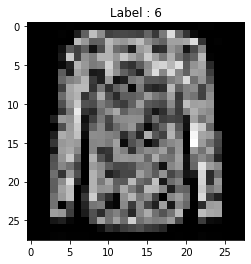

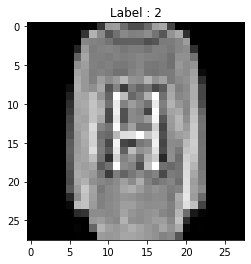

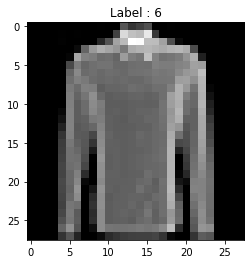

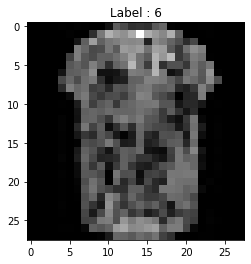

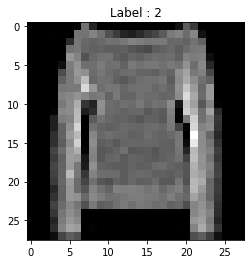

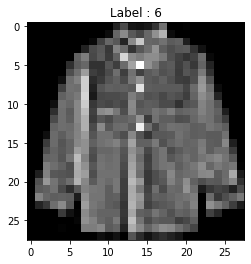

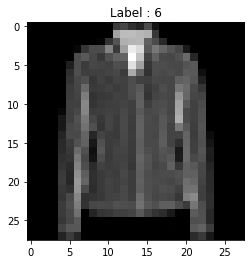

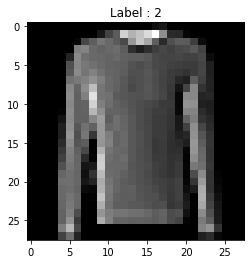

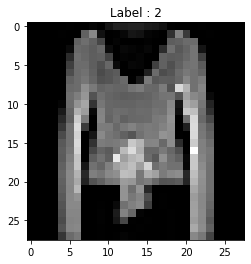



Cluster 6 -


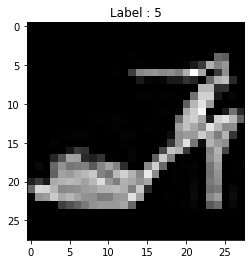

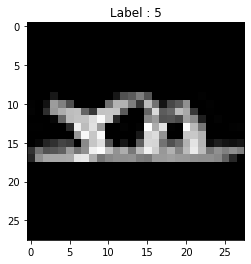

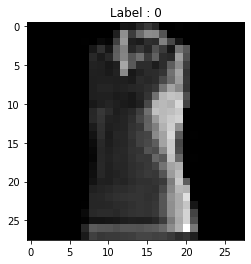

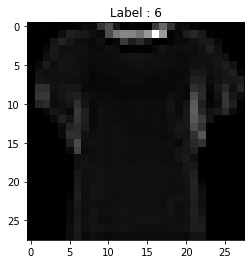

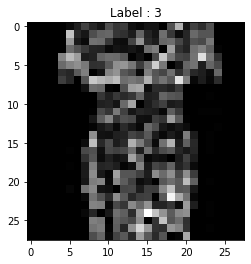

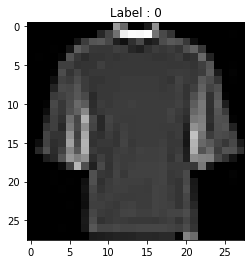

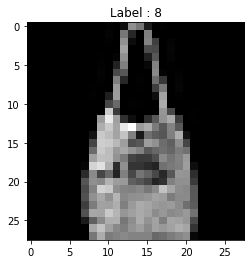

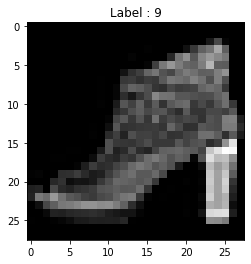

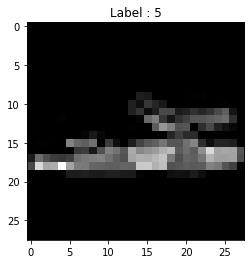

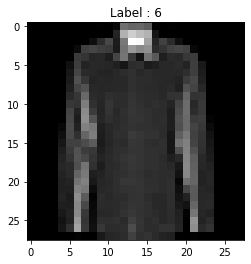



Cluster 7 -


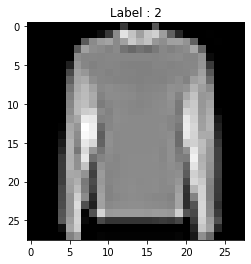

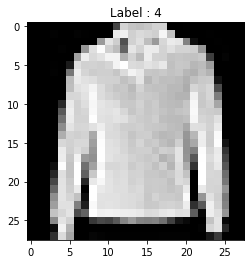

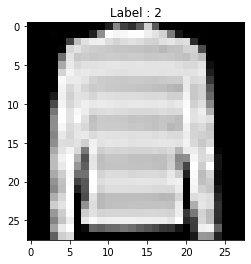

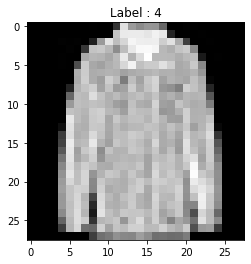

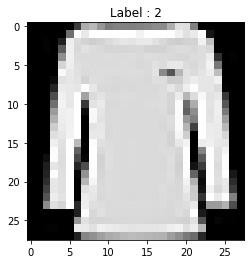

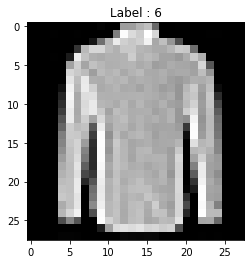

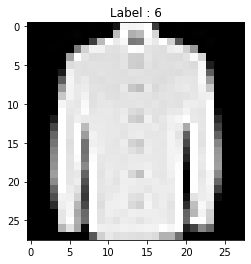

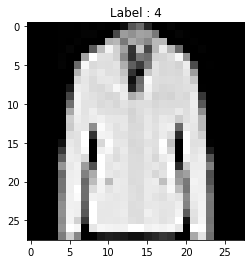

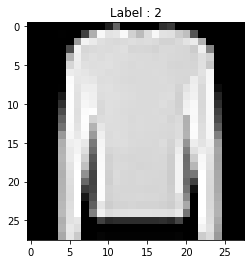

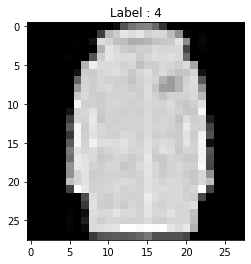



Cluster 8 -


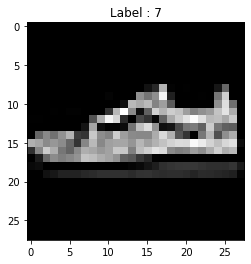

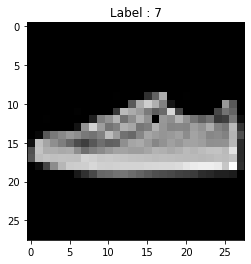

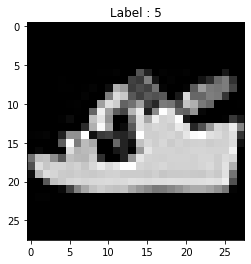

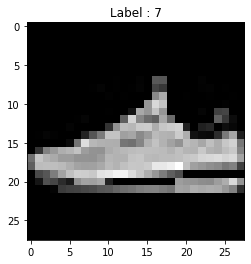

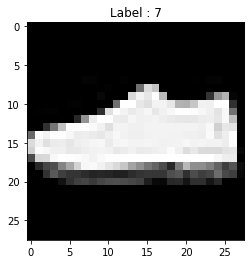

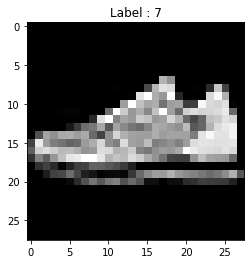

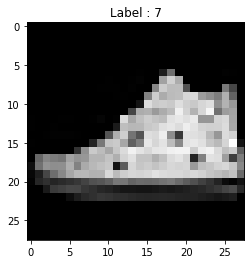

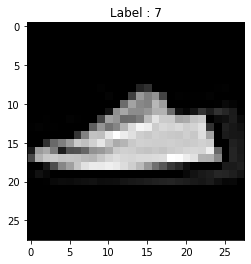

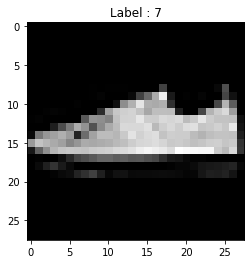

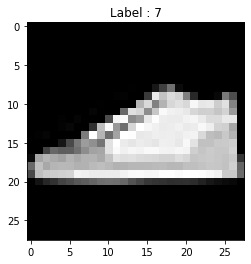



Cluster 9 -


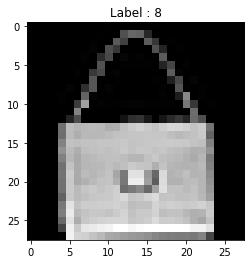

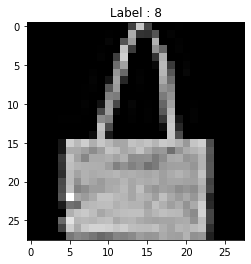

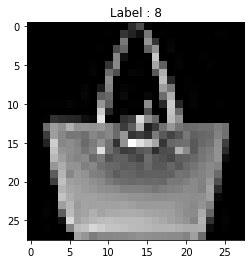

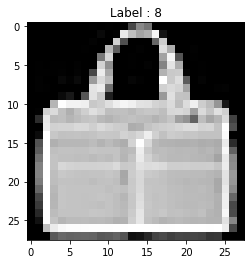

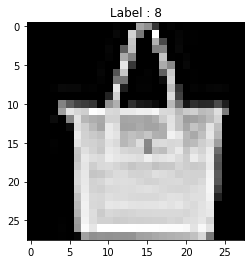

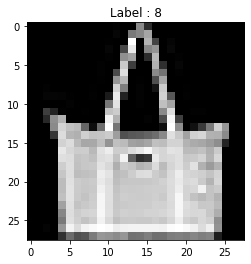

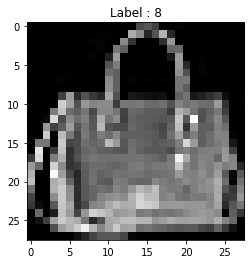

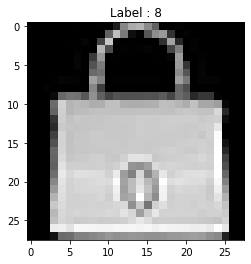

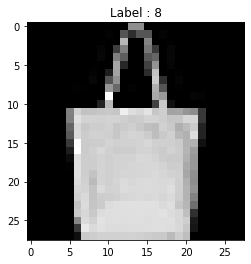

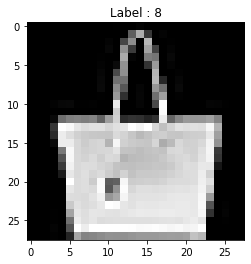



Cluster 10 -


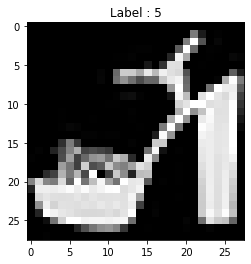

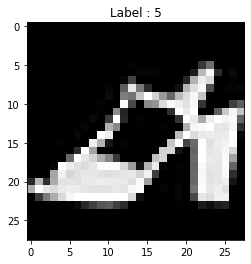

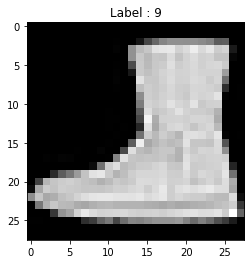

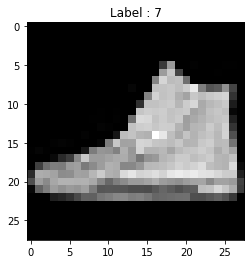

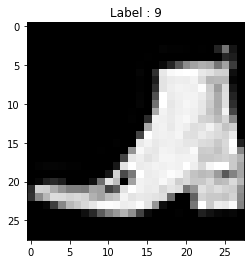

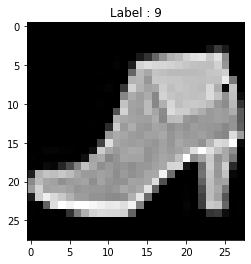

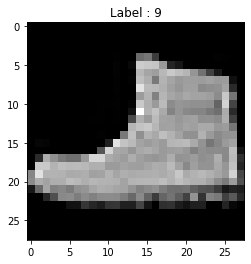

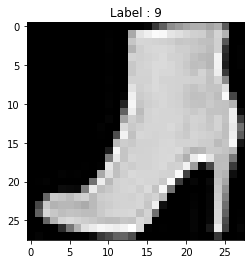

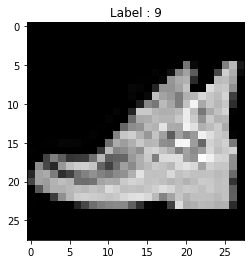

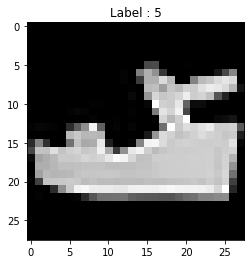

In [ ]:
n = x.shape[0]

cluster = [0]*n
d = np.zeros((k,n))

for i in range(k) :
  d[i] = np.sum(np.square(x-np.array(km2.cluster_centers)[i]),axis=1)

cluster = d.argmin(axis=0)

for i in range(k) : 
  print("Cluster",i+1,"-")
  idx = random.sample([c for c,elem in enumerate(cluster) if elem==i], 10)
  for j in idx : 
    plot_784(x.iloc[j],y.iloc[j])
  print()
  print()

####h) SSE in both KMeans

In [ ]:
def SSE(kmeans,x) : 
  n = x.shape[0]
  cluster = [0]*n
  d = np.zeros((k,n))
  for i in range(k) :
    d[i] = np.sum(np.square(x-np.array(kmeans.cluster_centers)[i]),axis=1)
  dist = d.min(axis=0)
  return sum(dist)


print("SSE KMeans (Part c) -",SSE(km,x))
print("SSE KMeans (Part f) -",SSE(km2,x))

SSE KMeans (Part c) - 1927645.1240386479
SSE KMeans (Part f) - 1915347.257100598
